#### 1. Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

#### 2. Data Collection & Analysis

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv', sep = ',')

#### 3. Analisis Data Eksplorasi

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Memilih kolom Annual Income  & Spending Score

Pada customer data head, dapat dilihat bahwa untuk kolom Annual Income dan Spending Score berada pada kolom ke-3 dan kolom ke-4

In [7]:
X = customer_data.iloc[:,[3,4]].values

#### WCSS  ->  Within Clusters Sum of Squares

In [9]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

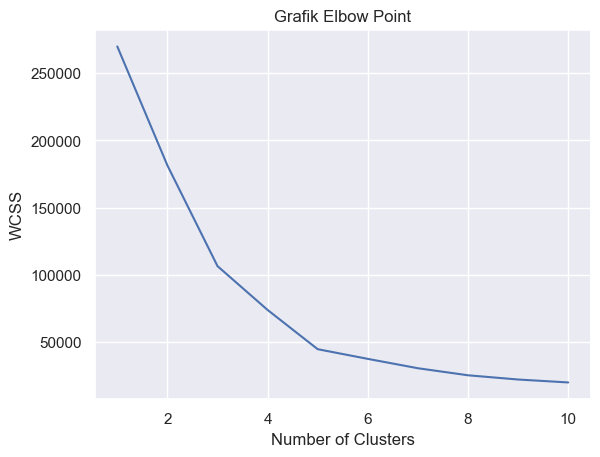

In [10]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Grafik Elbow Point')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### 4. Melatih Model Pengelompokan k-Means

In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


#### 5. Memvisualisasikan semua Cluster

#### 5.1 Visualisasi data sebelum dilakukan klaster

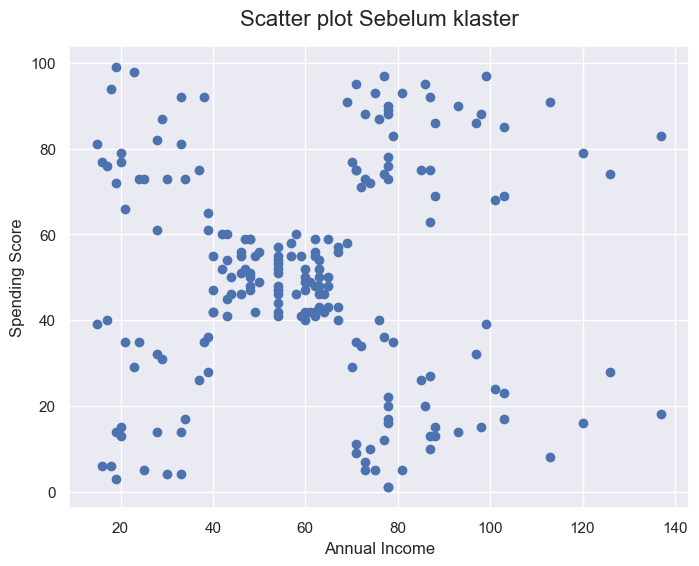

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Scatter plot Sebelum klaster', size = 16, pad = 15)
plt.show()

#### 5.2 Visualisasi data sesudah dilakukan klaster

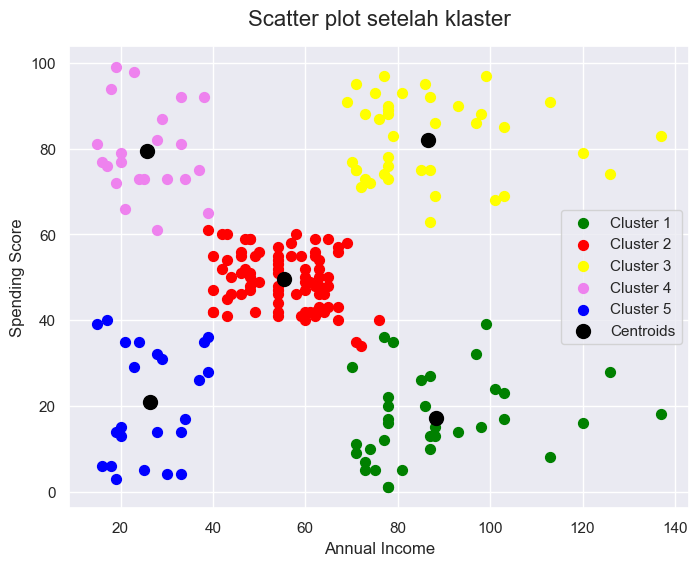

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Scatter plot setelah klaster', size = 16, pad = 15)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()